### Dataset Overview
- The dataset contains health-related variables, including **Physical Activity**, **Heart Disease**, and other potential confounders like **Age**, **Smoking**, and **BMI**.
- We checked for missing values and found none, which ensures the dataset is clean and ready for analysis.
- Key variables include:
  - **HeartDisease:** The target variable (outcome).
  - **PhysicalActivity:** The treatment variable.
  - **Smoking, AgeCategory, BMI, etc.:** Potential confounders to be controlled in the analysis.


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r'heart_2020_cleaned.csv')

# Display the first few rows
print(df.head())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

### Summary Statistics for Continuous Variables
- This table provides descriptive statistics for key continuous variables:
  - **BMI:** Reflects body mass index and is a known risk factor for heart disease.
  - **PhysicalHealth:** Number of days in the past month with poor physical health, which may influence physical activity levels.
  - **MentalHealth:** Number of days in the past month with poor mental health, which may indirectly affect physical activity.
  - **SleepTime:** Average hours of sleep per day, a potential confounder for heart disease risk.

- Observations:
  - The average BMI (~28) suggests that many individuals are overweight.
  - Poor physical and mental health (averages ~3 days/month) indicate that health issues are common.
  - Sleep time averages about 7 hours, aligning with general health recommendations.

- **Relevance to Question:**
  - These variables, especially BMI and PhysicalHealth, could confound the relationship between physical activity and heart disease.


In [3]:
# Summary statistics for continuous variables
continuous_summary = {
    'Variable': [],
    'Mean': [],
    'Median': [],
    'Mode': [],
    'Min': [],
    'Max': [],
}

for col in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']:
    continuous_summary['Variable'].append(col)
    continuous_summary['Mean'].append(df[col].mean())
    continuous_summary['Median'].append(df[col].median())
    continuous_summary['Mode'].append(df[col].mode()[0])
    continuous_summary['Min'].append(df[col].min())
    continuous_summary['Max'].append(df[col].max())

continuous_summary_df = pd.DataFrame(continuous_summary)
print(continuous_summary_df)


         Variable       Mean  Median   Mode    Min    Max
0             BMI  28.325399   27.34  26.63  12.02  94.85
1  PhysicalHealth   3.371710    0.00   0.00   0.00  30.00
2    MentalHealth   3.898366    0.00   0.00   0.00  30.00
3       SleepTime   7.097075    7.00   7.00   1.00  24.00


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


### Physical Activity and Heart Disease
- This bar chart visualizes the relationship between **Physical Activity** (treatment variable) and **Heart Disease** (outcome variable).

#### Observations:
- Individuals who engage in regular physical activity are less likely to have heart disease.
- The inactive group has a higher count of individuals with heart disease compared to the active group.

#### Relevance to Question:
- This plot directly supports the causal question: *"Does regular physical activity reduce the risk of heart disease?"*
- However, this relationship might be influenced by confounders like age, BMI, and smoking, which need further exploration.


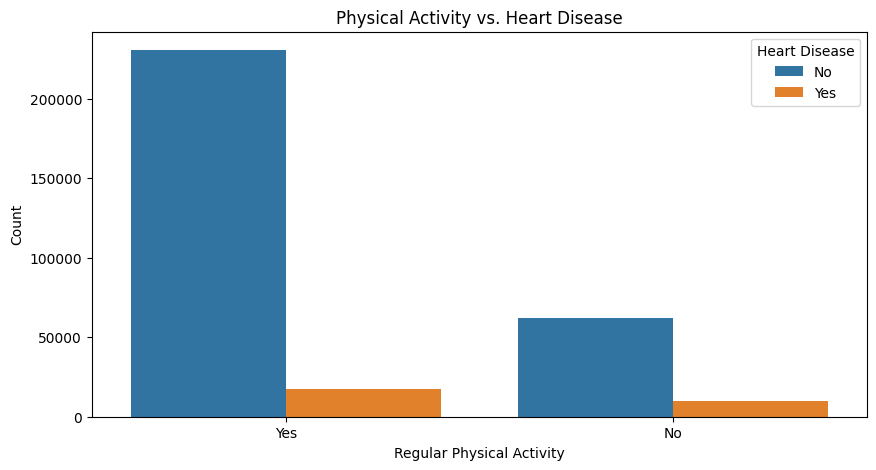

In [5]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="PhysicalActivity", hue="HeartDisease")
plt.title("Physical Activity vs. Heart Disease")
plt.xlabel("Regular Physical Activity")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


### Distribution of BMI
- This histogram visualizes the distribution of **Body Mass Index (BMI)** in the dataset.

#### Observations:
- The BMI distribution shows a peak around 25–30, indicating that many individuals fall into the **overweight category**.
- A smaller portion of individuals has a BMI above 40, reflecting extreme obesity.

#### Relevance to Question:
- BMI is a known risk factor for heart disease and could confound the relationship between physical activity and heart disease.
- Controlling for BMI in the analysis will help isolate the effect of physical activity on heart disease.


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


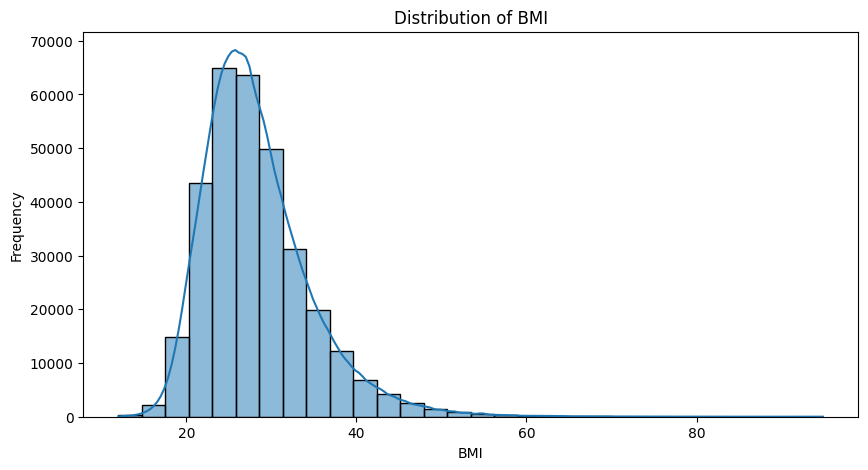

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df["BMI"], kde=True, bins=30)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()


### Distribution of Sleep Time
- This histogram shows the distribution of **Sleep Time** (hours of sleep per day) among individuals in the dataset.

#### Observations:
- The distribution peaks around **7–8 hours**, which aligns with recommended sleep guidelines for most adults.
- A smaller portion of individuals reports sleeping fewer than 5 hours or more than 10 hours per day.

#### Relevance to Question:
- **SleepTime** is a potential confounder because insufficient or excessive sleep is associated with health issues, including heart disease.
- SleepTime may also influence energy levels and the ability to engage in regular physical activity, indirectly affecting heart disease risk.


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


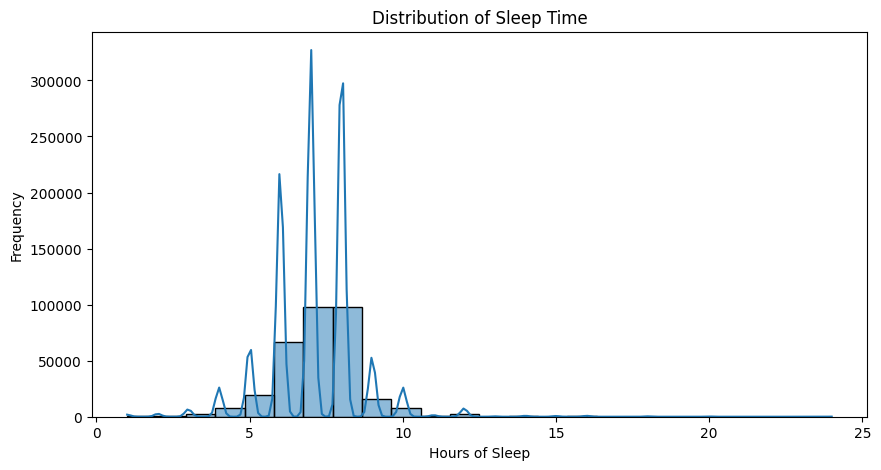

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df["SleepTime"], kde=True, bins=24)
plt.title("Distribution of Sleep Time")
plt.xlabel("Hours of Sleep")
plt.ylabel("Frequency")
plt.show()


### Boxplot of BMI (Outlier Detection)
- This boxplot visualizes the distribution of **Body Mass Index (BMI)** and highlights potential outliers.

#### Observations:
- The central BMI range falls between approximately **20 and 35**, with a median around 28.
- A few outliers with BMI values above 50 are present, indicating extreme obesity.

#### Relevance to Question:
- Identifying BMI outliers is crucial because they may disproportionately influence the relationship between physical activity and heart disease.
- Including or excluding outliers should be considered when analyzing BMI as a confounder in the causal model.


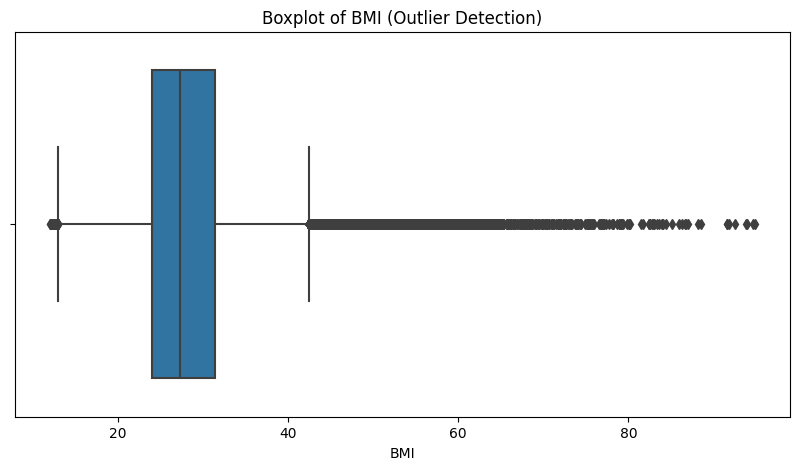

In [8]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["BMI"])
plt.title("Boxplot of BMI (Outlier Detection)")
plt.xlabel("BMI")
plt.show()


### Correlation Heatmap of Continuous Variables
- This heatmap visualizes the correlations between key continuous variables: **BMI**, **PhysicalHealth**, **MentalHealth**, and **SleepTime**.

#### Observations:
- A moderate positive correlation (**0.29**) exists between **PhysicalHealth** and **MentalHealth**, suggesting that individuals with poor physical health tend to report poorer mental health.
- Other correlations (e.g., between BMI and SleepTime) are weak or negligible.

#### Relevance to Question:
- Understanding these correlations helps identify potential interactions or dependencies among variables that might confound the relationship between physical activity and heart disease.
- For example:
  - MentalHealth may indirectly influence physical activity levels.
  - BMI and SleepTime are unlikely to strongly influence each other in this dataset, but both should still be considered as confounders in causal analysis.


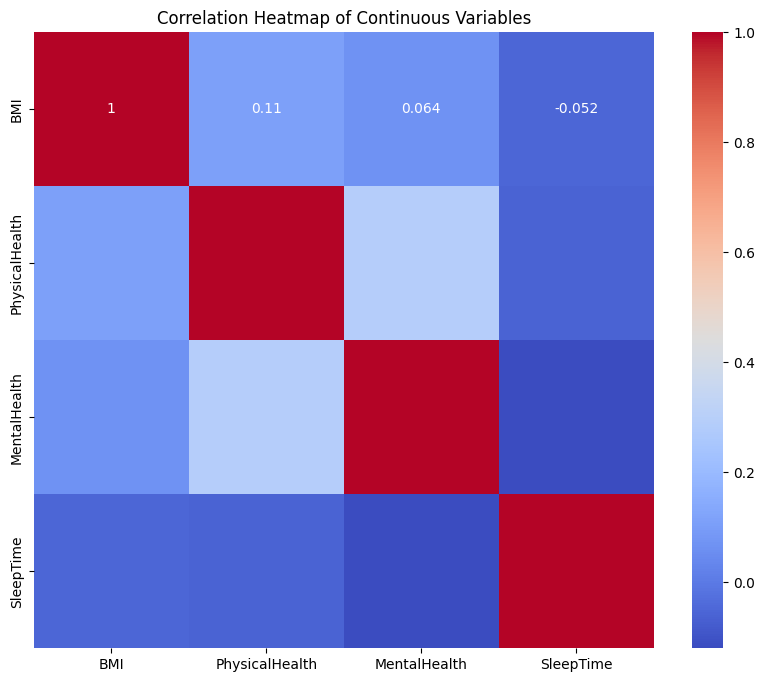

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Continuous Variables")
plt.show()


### Distribution of Physical Activity by Age Category
- This stacked histogram shows how **Physical Activity** levels vary across different **Age Categories**.

#### Observations:
- **Younger age groups** (e.g., **18–24**, **25–34**) are more likely to engage in regular physical activity.
- **Older age groups** (e.g., **65+**) have significantly lower levels of physical activity.
- The decline in physical activity levels appears to be consistent as age increases.

#### Relevance to Question:
- **Age** is a critical confounder in the relationship between physical activity and heart disease:
  - Older individuals are more likely to develop heart disease, regardless of their physical activity levels.
  - Adjusting for age in the causal model will help isolate the effect of physical activity on heart disease.


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subs

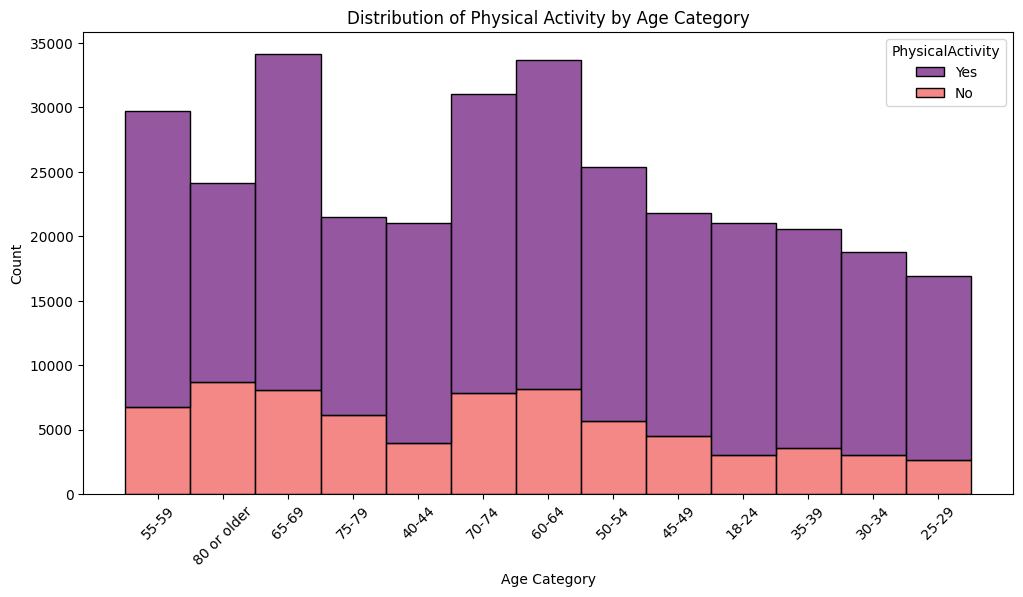

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="AgeCategory", hue="PhysicalActivity", multiple="stack", palette="magma")
plt.title("Distribution of Physical Activity by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Smoking and Heart Disease
- This bar chart explores the relationship between **Smoking** (potential confounder) and **Heart Disease** (outcome).

#### Observations:
- Smokers are more likely to have heart disease compared to non-smokers, as shown by the higher proportion of heart disease cases among smokers.
- Non-smokers have a lower prevalence of heart disease.

#### Relevance to Question:
- Smoking is a potential confounder in the relationship between physical activity and heart disease.
- Smokers may also engage in lower levels of physical activity, further complicating the analysis.
- This highlights the need to control for smoking when estimating the causal effect of physical activity on heart disease.


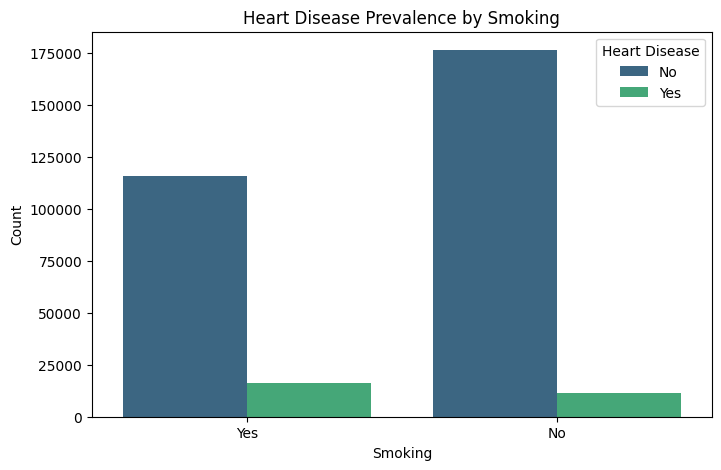

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Smoking", hue="HeartDisease", palette="viridis")
plt.title("Heart Disease Prevalence by Smoking")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.legend(title="Heart Disease")
plt.show()


### Heart Disease vs. BMI, Sleep Time, and General Health
- This composite figure explores the relationship between **Heart Disease** and three key variables: **BMI**, **SleepTime**, and **GenHealth**.

#### Observations:
1. **Heart Disease vs. BMI:**
   - Individuals with heart disease tend to have slightly higher BMI on average compared to those without heart disease.
   - However, there is considerable overlap between the two groups.

2. **Heart Disease vs. Sleep Time:**
   - The boxplot suggests that individuals with heart disease report slightly lower average sleep time compared to those without heart disease.
   - Outliers with very high or low sleep times are present in both groups.

3. **General Health Distribution:**
   - Individuals with poor or fair general health are more likely to have heart disease.
   - Excellent or very good health is associated with a lower prevalence of heart disease.

#### Relevance to Question:
- **BMI and SleepTime:** These are potential confounders that may influence both physical activity and heart disease risk. Controlling for these variables is critical to isolating the causal effect of physical activity.
- **General Health:** This variable captures a broad assessment of individual well-being, which could mediate the relationship between physical activity and heart disease.


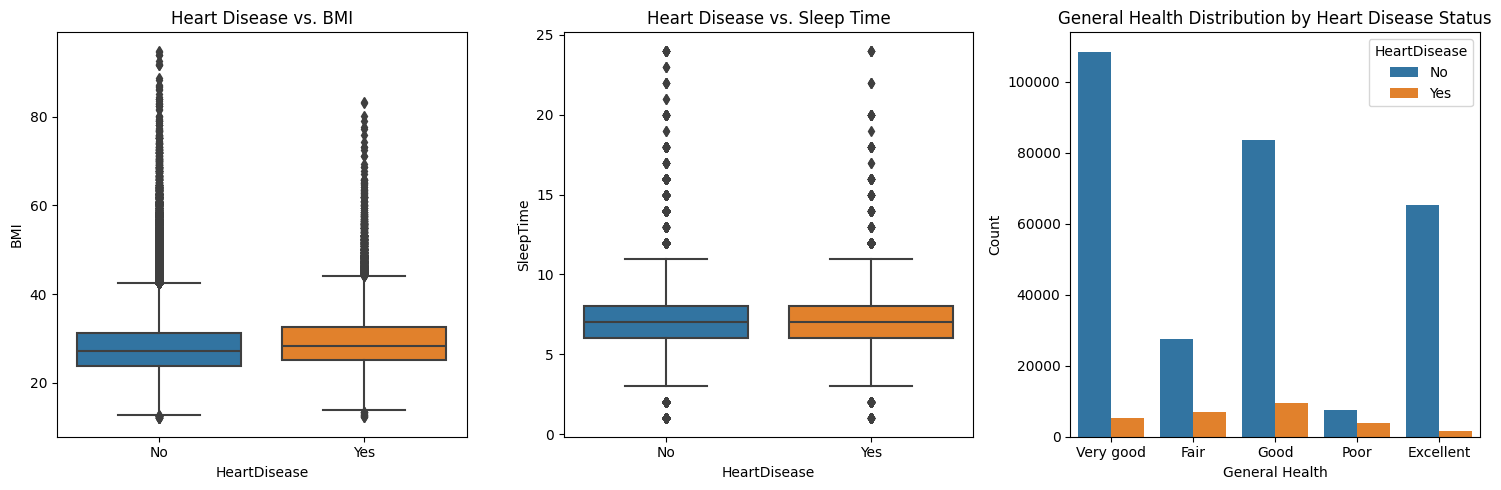

In [12]:
plt.figure(figsize=(15, 5))

# BMI
plt.subplot(1, 3, 1)
sns.boxplot(data=df, x="HeartDisease", y="BMI")
plt.title("Heart Disease vs. BMI")

# GenHealth
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x="HeartDisease", y="SleepTime")
plt.title("Heart Disease vs. Sleep Time")

# General Health Distribution by Heart Disease Status
plt.subplot(1, 3, 3)
sns.countplot(data=df, x="GenHealth", hue="HeartDisease")
plt.title("General Health Distribution by Heart Disease Status")
plt.xlabel("General Health")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Physical Activity by Age Category
- This stacked histogram shows how **Physical Activity** varies across different **Age Categories**.

#### Observations:
- Younger age groups (e.g., **18–24**, **25–34**) have higher levels of physical activity compared to older age groups (e.g., **65+**).
- Physical activity levels decline steadily as age increases, which is expected given that older individuals may face more physical health limitations.

#### Relevance to Question:
- Age is a significant confounder, as older individuals are more likely to have heart disease and also tend to engage in less physical activity.
- Controlling for age is essential to isolate the causal effect of physical activity on heart disease risk.


### Physical Activity General Health
- This figure explores the distribution of **Physical Activity** across  **General Health (GenHealth)**.

#### Observations:

**Physical Activity by General Health:**
   - Individuals reporting **excellent** or **very good health** are more likely to be physically active.
   - Those with **poor** or **fair general health** engage in significantly less physical activity.

#### Relevance to Question:

- **GenHealth:**
  - General health is an important mediator, as better health often enables higher physical activity levels and reduces heart disease risk.
  - Incorporating this variable into the causal model helps clarify the direct effect of physical activity.


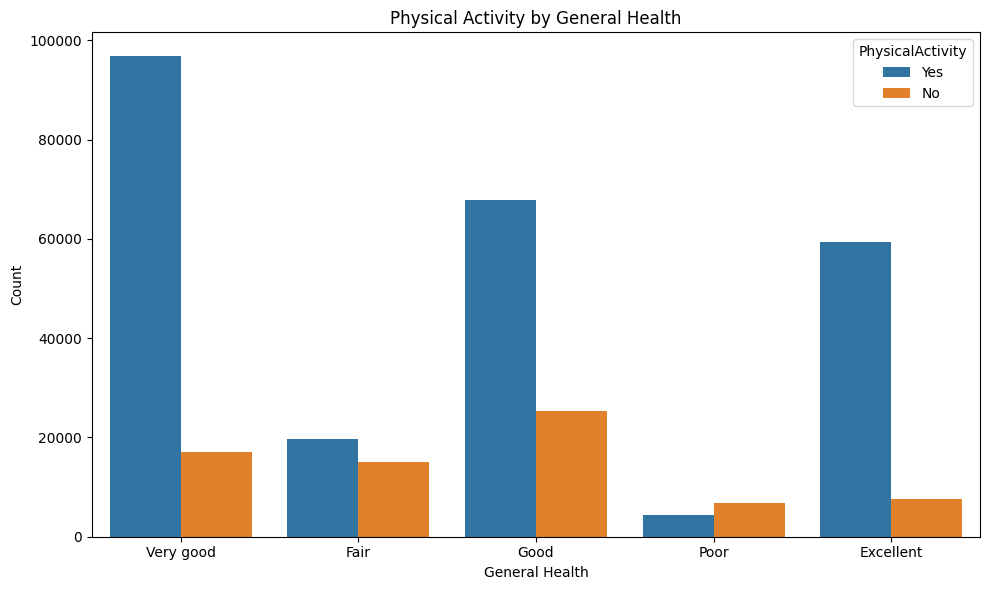

In [13]:
# Physical Activity by General Health
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="GenHealth", hue="PhysicalActivity")
plt.title("Physical Activity by General Health")
plt.xlabel("General Health")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Physical Activity vs. Heart Disease
- This bar chart visualizes the relationship between **Regular Physical Activity** and the prevalence of **Heart Disease**.

#### Observations:
- Individuals who engage in **regular physical activity** are significantly less likely to have heart disease compared to those who are inactive.
- The proportion of individuals with heart disease is much higher among those who do not engage in regular physical activity.

#### Relevance to Question:
- This visualization directly addresses the causal question: *"Does Regular Physical Activity Reduce the Risk of Heart Disease?"*
- It provides strong descriptive evidence supporting the hypothesis that regular physical activity lowers the risk of heart disease.
- Further analysis is needed to control for confounders (e.g., age, BMI, smoking) to establish a causal relationship.


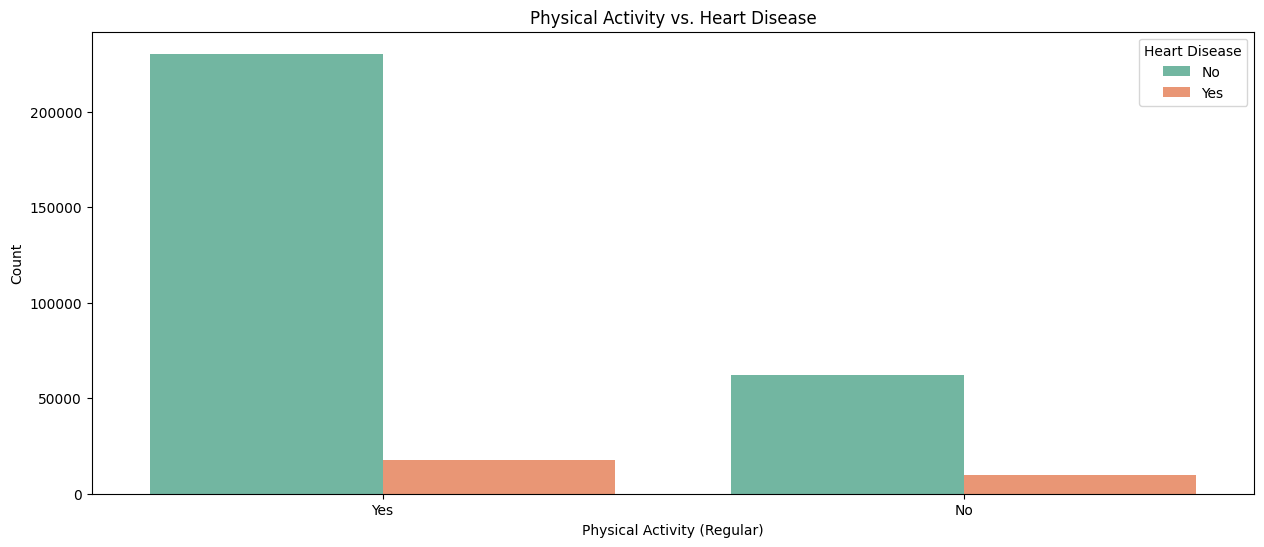

In [14]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="PhysicalActivity", hue="HeartDisease", palette="Set2", dodge=True)
plt.title("Physical Activity vs. Heart Disease")
plt.xlabel("Physical Activity (Regular)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


### Age Categories and Physical Activity Stratified by Heart Disease
- This bar chart examines the relationship between **Age Categories**, **Physical Activity**, and **Heart Disease**.

#### Observations:
- **Heart Disease Prevalence Across Age Categories:**
  - Older age groups (e.g., **65+**) have a significantly higher prevalence of heart disease compared to younger groups (e.g., **18–24**).
  - Younger individuals (e.g., **18–34**) have a lower count of heart disease cases.

- **Age and Physical Activity:**
  - Physical activity levels decline with age, as previously observed. Older individuals are more likely to be both inactive and have heart disease.

#### Relevance to Question:
- **AgeCategory** is a critical confounder in the relationship between physical activity and heart disease:
  - Older age groups are inherently at a higher risk of heart disease and are less likely to engage in physical activity.
  - Adjusting for age in causal analysis is essential to isolate the effect of physical activity on heart disease risk.
- This visualization reinforces the importance of controlling for age when interpreting the impact of physical activity on heart disease.


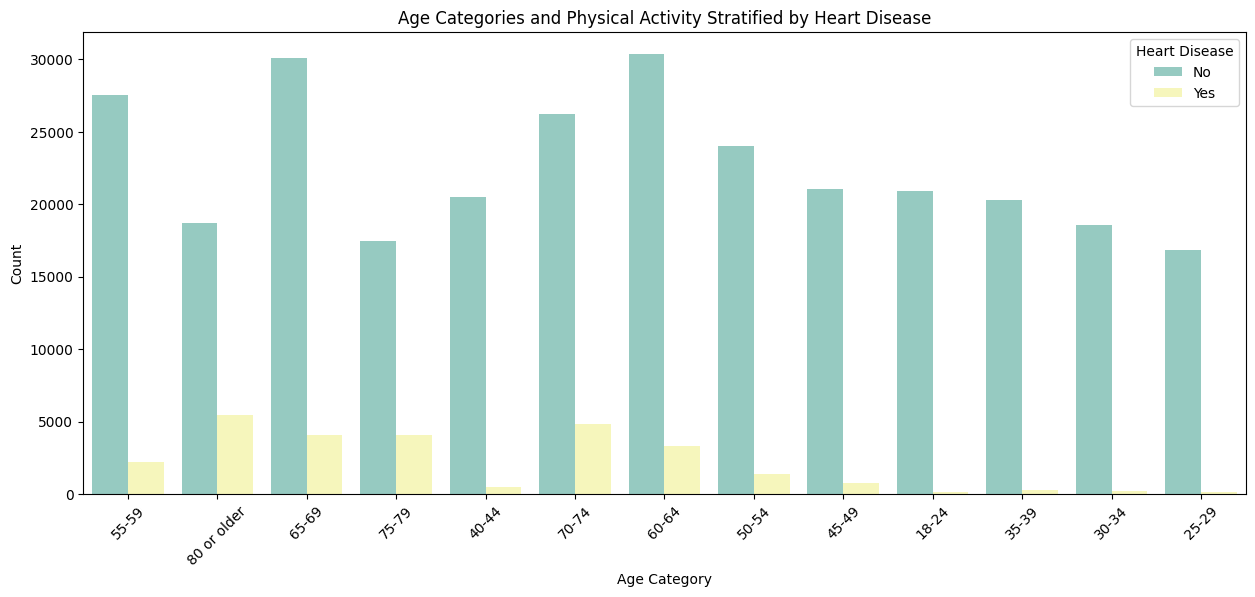

In [15]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="AgeCategory", hue="HeartDisease", palette="Set3")
plt.title("Age Categories and Physical Activity Stratified by Heart Disease")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


### General Health vs. BMI Distribution
- This boxplot illustrates the relationship between **General Health (GenHealth)** and **BMI**.

#### Observations:
- Individuals with **excellent** or **very good general health** tend to have lower BMI, with medians around the normal weight range.
- Higher BMI values are associated with poorer general health categories like **fair** or **poor**, with a wider spread in these groups.

#### Relevance to Question:
- **BMI** is both a potential confounder and a mediator in the relationship between physical activity and heart disease:
  - Poor general health and higher BMI might discourage physical activity, indirectly influencing heart disease risk.
- This visualization highlights the importance of controlling for BMI and general health in the causal analysis of physical activity’s effect on heart disease.


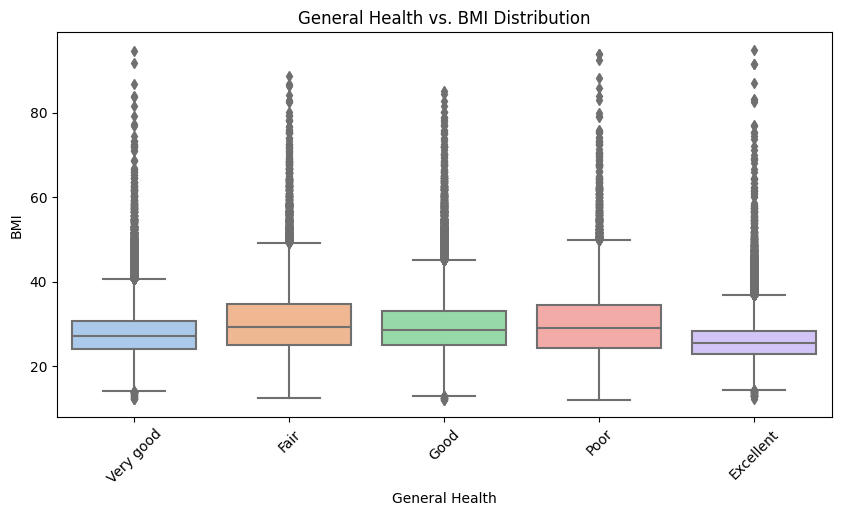

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="GenHealth", y="BMI", palette="pastel")
plt.title("General Health vs. BMI Distribution")
plt.xlabel("General Health")
plt.ylabel("BMI")
plt.xticks(rotation=45)
plt.show()


### BMI vs. Sleep Time Colored by Heart Disease
- This scatter plot examines the relationship between **BMI** and **Sleep Time**, with points colored by **Heart Disease** status.

#### Observations:
- Individuals with heart disease (red points) are scattered across higher BMI ranges compared to those without heart disease.
- Sleep time does not show a strong trend with BMI in either group, though some individuals with very low or very high sleep times appear in the heart disease group.

#### Relevance to Question:
- **BMI** and **Sleep Time** are potential confounders in the relationship between physical activity and heart disease:
  - High BMI and irregular sleep patterns may independently increase heart disease risk while also influencing physical activity levels.
- Controlling for these variables in the causal analysis will ensure that the effect of physical activity on heart disease is not biased by these confounders.


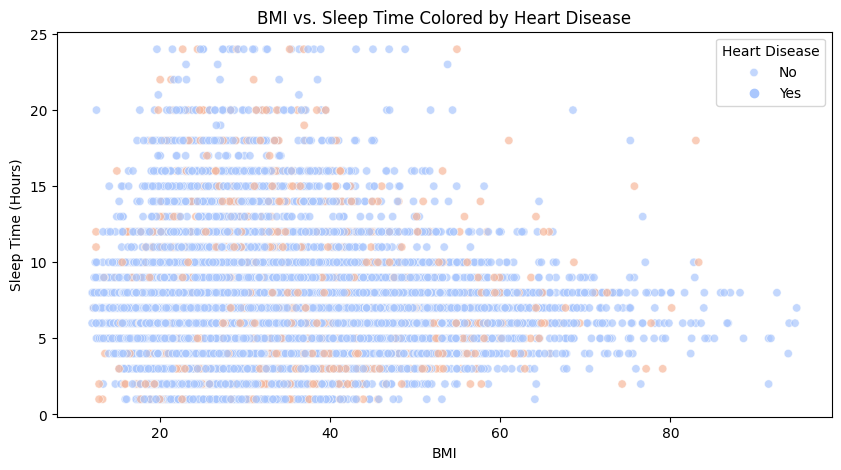

In [17]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="BMI", y="SleepTime", hue="HeartDisease", palette="coolwarm", alpha=0.7)
plt.title("BMI vs. Sleep Time Colored by Heart Disease")
plt.xlabel("BMI")
plt.ylabel("Sleep Time (Hours)")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


In [18]:
# Check the column names in the DataFrame
print(df.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [19]:
# Check unique values in the PhysicalActivity column
print(df['PhysicalActivity'].unique())


['Yes' 'No']


### Binarizing BMI
This cell creates a binary variable, `Overweight`, based on the BMI values in the dataset. Individuals with a BMI of 25 or greater are classified as overweight (1), while those with a BMI less than 25 are classified as not overweight (0). This transformation helps simplify the analysis of BMI as a risk factor for heart disease.


In [20]:
# Binarizing BMI
df['Overweight'] = (df['BMI'] >= 25).astype(int)

# Display the first few rows to confirm the new column
print(df[['BMI', 'Overweight']].head())


     BMI  Overweight
0  16.60           0
1  20.34           0
2  26.58           1
3  24.21           0
4  23.71           0


### Binarizing Physical Health
In this cell, we create a binary variable, `PoorPhysicalHealth`, based on the number of days individuals reported poor physical health in the past month. A value of 1 indicates that the individual experienced at least one day of poor physical health, while a value of 0 indicates no days of poor physical health. This transformation facilitates the analysis of the impact of physical health on heart disease risk.


In [21]:
# Binarizing Physical Health
df['PoorPhysicalHealth'] = (df['PhysicalHealth'] > 0).astype(int)

# Display the first few rows to confirm the new column
print(df[['PhysicalHealth', 'PoorPhysicalHealth']].head())


   PhysicalHealth  PoorPhysicalHealth
0             3.0                   1
1             0.0                   0
2            20.0                   1
3             0.0                   0
4            28.0                   1


### One-Hot Encoding General Health
This cell applies one-hot encoding to the `GenHealth` variable, transforming it into multiple binary (dummy) variables. Each new column represents a category of general health, allowing for a more granular analysis of how different health statuses relate to heart disease risk. The `drop_first=True` parameter is used to avoid the dummy variable trap by excluding one category.


In [22]:
# One-hot encoding GenHealth
df = pd.get_dummies(df, columns=['GenHealth'], drop_first=True)

# Display the first few rows to confirm the new columns
print(df.head())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory  ... SleepTime Asthma  \
0          30.0          No  Female        55-59  ...       5.0    Yes   
1           0.0          No  Female  80 or older  ...       7.0     No   
2          30.0          No    Male        65-69  ...       8.0    Yes   
3           0.0          No  Female        75-79  ...       6.0     No   
4           0.0         Yes  Female        40-44  ...       8.0     No   

  KidneyDisease  SkinCancer Overweight PoorPhysicalHealth GenHealth_Fair  \
0            No         Yes          0        

In [23]:
print(df[['BMI', 'PhysicalActivity']].dtypes)


BMI                 float64
PhysicalActivity     object
dtype: object


### Converting Physical Activity to Binary Numeric Values
This cell transforms the `PhysicalActivity` variable from categorical values ('Yes' and 'No') to binary numeric values (1 for 'Yes' and 0 for 'No'). This conversion facilitates the analysis of the impact of physical activity on heart disease risk. The cell also checks for any NaN values after the conversion to ensure data integrity and confirms the successful changes by displaying the first few rows of the updated column.


In [24]:
# Convert PhysicalActivity to binary numeric values
df['PhysicalActivity'] = df['PhysicalActivity'].map({'Yes': 1, 'No': 0})

# Check for NaN values after conversion
print(df['PhysicalActivity'].isnull().sum())

# Display the first few rows to confirm the changes
print(df[['PhysicalActivity']].head())


0
   PhysicalActivity
0                 1
1                 1
2                 1
3                 0
4                 1


### Creating the Interaction Feature: BMI and Physical Activity
This cell generates an interaction feature called `BMI_PhysicalActivity`, which is the product of the `BMI` and `PhysicalActivity` variables. This interaction term helps to assess whether the effect of physical activity on heart disease risk varies depending on an individual's BMI. The cell concludes by displaying the first few rows to confirm the successful creation of the new column.


In [25]:
# Creating the interaction feature
df['BMI_PhysicalActivity'] = df['BMI'] * df['PhysicalActivity']

# Display the first few rows to confirm the new column
print(df[['BMI', 'PhysicalActivity', 'BMI_PhysicalActivity']].head())


     BMI  PhysicalActivity  BMI_PhysicalActivity
0  16.60                 1                 16.60
1  20.34                 1                 20.34
2  26.58                 1                 26.58
3  24.21                 0                  0.00
4  23.71                 1                 23.71


### One-Hot Encoding Age Category and Creating Interaction Features
This cell applies one-hot encoding to the `AgeCategory` variable, generating binary dummy variables for each age category while dropping the first category to avoid the dummy variable trap. The resulting dummy variables are then concatenated to the original DataFrame. Subsequently, interaction features are created by multiplying each age category dummy variable with the `PhysicalActivity` variable. These interaction terms allow for the examination of how the effect of physical activity on heart disease risk varies across different age categories. The cell concludes by displaying the first few rows of the new interaction columns to confirm their creation.


In [26]:
# One-hot encoding AgeCategory
age_dummies = pd.get_dummies(df['AgeCategory'], prefix='Age', drop_first=True)

# Concatenate the new dummy variables to the original dataframe
df = pd.concat([df, age_dummies], axis=1)

# Creating interaction features for each age category with PhysicalActivity
for col in age_dummies.columns:
    df[f'{col}_PhysicalActivity'] = df[col] * df['PhysicalActivity']

# Display the first few rows to confirm the new columns
print(df.filter(like='_PhysicalActivity').head())


   BMI_PhysicalActivity  Age_25-29_PhysicalActivity  \
0                 16.60                           0   
1                 20.34                           0   
2                 26.58                           0   
3                  0.00                           0   
4                 23.71                           0   

   Age_30-34_PhysicalActivity  Age_35-39_PhysicalActivity  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   Age_40-44_PhysicalActivity  Age_45-49_PhysicalActivity  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0 

### Standardizing Continuous Variables
In this cell, continuous variables including `BMI`, `PhysicalHealth`, `MentalHealth`, and `SleepTime` are standardized using the `StandardScaler`. Standardization transforms these variables to have a mean of 0 and a standard deviation of 1, allowing for a more consistent scale across features. This transformation is crucial for many statistical analyses and modeling techniques, as it helps to eliminate the impact of differing scales on the results. The cell concludes by displaying the first few rows of the standardized features to confirm the scaling process.


In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of features to standardize
features_to_scale = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']  # Add 'HealthRiskIndex' if created

# Standardizing the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the first few rows to confirm the scaling
print(df[features_to_scale].head())


        BMI  PhysicalHealth  MentalHealth  SleepTime
0 -1.844750       -0.046751      3.281069  -1.460354
1 -1.256338       -0.424070     -0.490039  -0.067601
2 -0.274603        2.091388      3.281069   0.628776
3 -0.647473       -0.424070     -0.490039  -0.763977
4 -0.726138        3.097572     -0.490039   0.628776


In [29]:
# Display all column names in the dataframe
print(df.columns)


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'Overweight', 'PoorPhysicalHealth',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'BMI_PhysicalActivity', 'Age_25-29', 'Age_30-34',
       'Age_35-39', 'Age_40-44', 'Age_45-49', 'Age_50-54', 'Age_55-59',
       'Age_60-64', 'Age_65-69', 'Age_70-74', 'Age_75-79', 'Age_80 or older',
       'Age_25-29_PhysicalActivity', 'Age_30-34_PhysicalActivity',
       'Age_35-39_PhysicalActivity', 'Age_40-44_PhysicalActivity',
       'Age_45-49_PhysicalActivity', 'Age_50-54_PhysicalActivity',
       'Age_55-59_PhysicalActivity', 'Age_60-64_PhysicalActivity',
       'Age_65-69_PhysicalActivity', 'Age_70-74_PhysicalActivity',
       'Age_75-79_PhysicalActivity', 'Age_80 or older_PhysicalActivity'],
      dt

### Cleaning the Smoking Column and Creating the Health Risk Index
This cell first cleans the `Smoking` column by converting its entries to string type and stripping any leading or trailing whitespace. It then maps the categorical values ('Yes' and 'No') to numeric values (1 for smokers and 0 for non-smokers). After ensuring that the conversion is successful and checking for any NaN values, the cell proceeds to create the `HealthRiskIndex`. This index is calculated by combining the `BMI`, `Smoking`, `GenHealth_Poor`, and `PhysicalActivity` variables, with specific weights assigned to each component. The cell concludes by displaying the first few rows of the relevant variables to confirm the successful creation of the Health Risk Index.


In [30]:
# Clean the Smoking column by converting to string type, if necessary
df['Smoking'] = df['Smoking'].astype(str).str.strip()

# Map Smoking to numeric values
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})

# Check for NaN values after conversion
print("NaN values in Smoking after conversion:", df['Smoking'].isnull().sum())

# If conversion is successful, create the Health Risk Index
df['HealthRiskIndex'] = (
    df['BMI'] +
    df['Smoking'] * 2 +  # Weight of 2 for Smoking
    df['GenHealth_Poor'] * 3 +  # Weight of 3 for Poor General Health
    (1 - df['PhysicalActivity'])  # Inverse of PhysicalActivity
)

# Display the first few rows to confirm the new index
print(df[['BMI', 'Smoking', 'GenHealth_Poor', 'PhysicalActivity', 'HealthRiskIndex']].head())


NaN values in Smoking after conversion: 0
        BMI  Smoking  GenHealth_Poor  PhysicalActivity  HealthRiskIndex
0 -1.844750        1           False                 1         0.155250
1 -1.256338        0           False                 1        -1.256338
2 -0.274603        1           False                 1         1.725397
3 -0.647473        0           False                 0         0.352527
4 -0.726138        0           False                 1        -0.726138


### Distribution of Health Risk Index
This cell plots the distribution of the Health Risk Index using a histogram. The plot includes a kernel density estimate (KDE) to provide a smooth representation of the distribution. Vertical dashed lines represent the mean (in red) and median (in blue) of the Health Risk Index, offering insights into the central tendency of the data. This visualization helps to understand how the Health Risk Index is distributed across individuals and can indicate potential areas of concern regarding health risk.


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


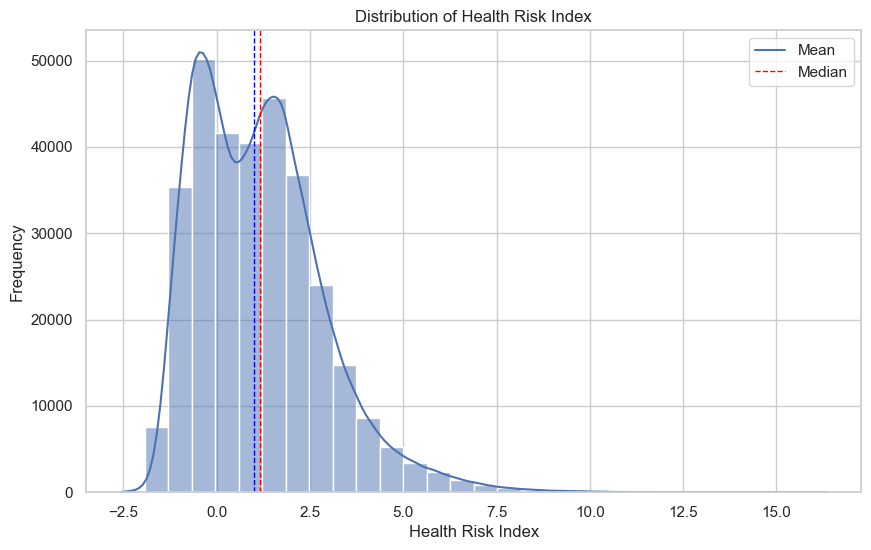

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plotting the distribution of the Health Risk Index
plt.figure(figsize=(10, 6))
sns.histplot(df['HealthRiskIndex'], bins=30, kde=True)
plt.title('Distribution of Health Risk Index')
plt.xlabel('Health Risk Index')
plt.ylabel('Frequency')
plt.axvline(df['HealthRiskIndex'].mean(), color='red', linestyle='dashed', linewidth=1)  # Mean line
plt.axvline(df['HealthRiskIndex'].median(), color='blue', linestyle='dashed', linewidth=1)  # Median line
plt.legend({'Mean': df['HealthRiskIndex'].mean(), 'Median': df['HealthRiskIndex'].median()})
plt.show()


### Box Plot of Health Risk Index by Heart Disease Status
This cell generates a box plot to compare the distribution of the Health Risk Index between individuals with and without heart disease. The plot visualizes the median, interquartile range (IQR), and any outliers, providing insights into how the Health Risk Index varies based on heart disease status. This visualization is crucial for understanding the potential impact of health risk on heart disease and supports the analysis of the relationship between physical activity and health outcomes.


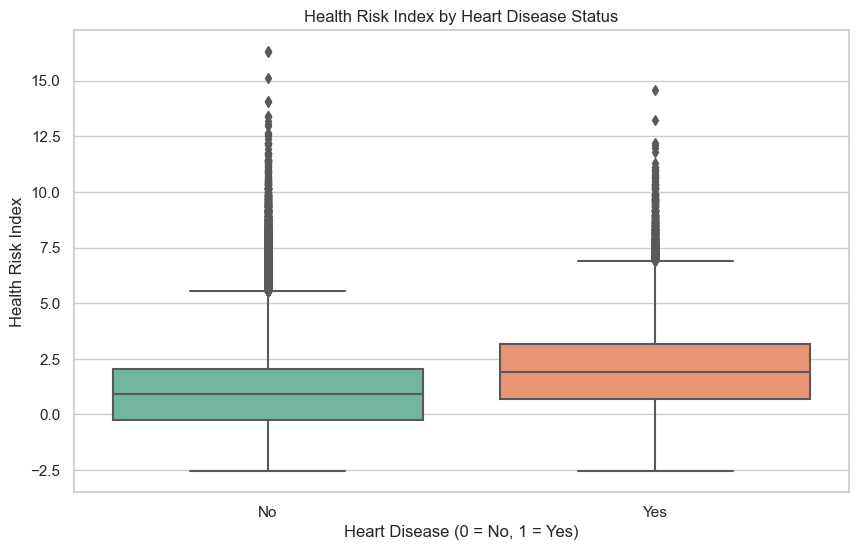

In [32]:
# Set the style for the visualization
sns.set(style="whitegrid")

# Create a box plot for Health Risk Index by Heart Disease status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='HeartDisease', y='HealthRiskIndex', palette='Set2')
plt.title('Health Risk Index by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Health Risk Index')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


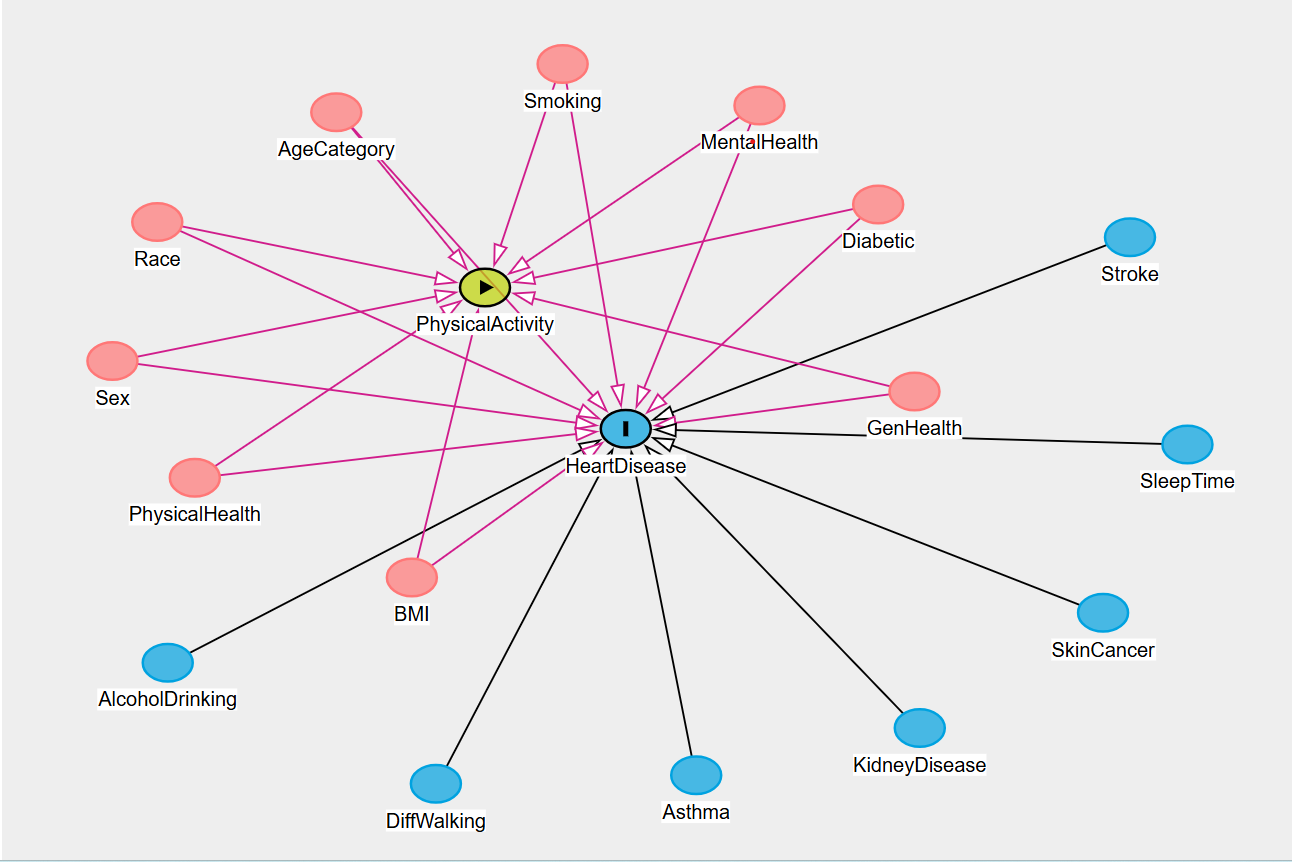

In [34]:
# DAG Construction Using DAGitty Exported Structure
from IPython.display import Image

dag_code = """
dag {
bb="-4.564,-4.852,5.087,5.037"
AgeCategory [pos="-2.085,-3.474"]
AlcoholDrinking [pos="-3.346,2.827"]
Asthma [pos="0.607,4.116"]
BMI [pos="-1.520,1.852"]
Diabetic [pos="1.969,-2.420"]
DiffWalking [pos="-1.340,4.213"]
GenHealth [pos="2.240,-0.278"]
HeartDisease [outcome,pos="0.080,0.149"]
KidneyDisease [pos="2.280,3.576"]
MentalHealth [pos="1.081,-3.553"]
PhysicalActivity [exposure,pos="-0.973,-1.470"]
PhysicalHealth [pos="-3.144,0.709"]
Race [pos="-3.425,-2.218"]
Sex [pos="-3.760,-0.627"]
SkinCancer [pos="3.651,2.255"]
SleepTime [pos="4.282,0.329"]
Smoking [pos="-0.392,-4.028"]
Stroke [pos="3.853,-2.044"]
AgeCategory -> HeartDisease
AgeCategory -> PhysicalActivity
AlcoholDrinking -> HeartDisease
Asthma -> HeartDisease
BMI -> HeartDisease
BMI -> PhysicalActivity
Diabetic -> HeartDisease
Diabetic -> PhysicalActivity
DiffWalking -> HeartDisease
GenHealth -> HeartDisease
GenHealth -> PhysicalActivity
KidneyDisease -> HeartDisease
MentalHealth -> HeartDisease
MentalHealth -> PhysicalActivity
PhysicalHealth -> HeartDisease
PhysicalHealth -> PhysicalActivity
Race -> HeartDisease
Race -> PhysicalActivity
Sex -> HeartDisease
Sex -> PhysicalActivity
SkinCancer -> HeartDisease
SleepTime -> HeartDisease
Smoking -> HeartDisease
Smoking -> PhysicalActivity
Stroke -> HeartDisease
}

"""

# Visualize DAG from DAGitty
Image(filename="dag.png")  # Replace with your saved DAG image


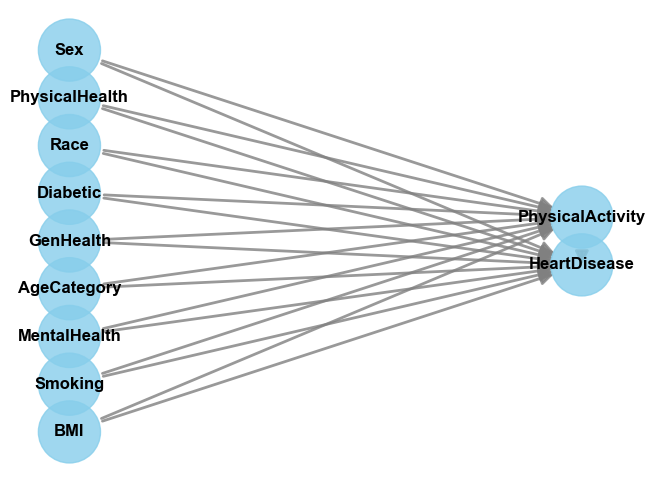

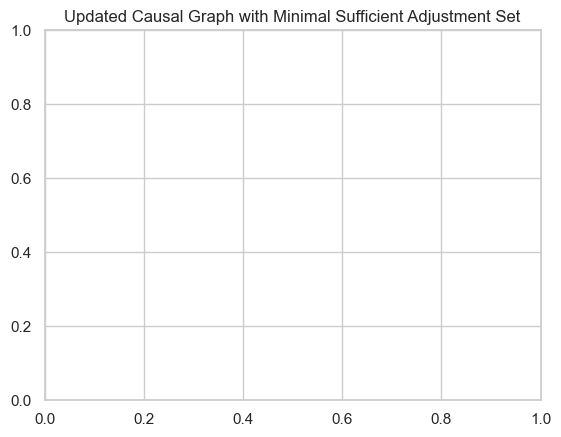

In [36]:
from dowhy import CausalModel
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_csv(r'heart_2020_cleaned.csv')

# Encode categorical variables
encoded_data = data.copy()
label_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
              'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'MentalHealth',
              'PhysicalHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for col in label_cols:
    encoder = LabelEncoder()
    encoded_data[col] = encoder.fit_transform(encoded_data[col])

# Define treatment, outcome, and confounders
treatment = 'PhysicalActivity'
outcome = 'HeartDisease'
confounders = ['AgeCategory', 'BMI', 'Diabetic', 'GenHealth', 'MentalHealth',
               'PhysicalHealth', 'Race', 'Sex', 'Smoking']

# Create a causal model
model = CausalModel(
    data=encoded_data,
    treatment=treatment,
    outcome=outcome,
    common_causes=confounders
)

identified_estimand = model.identify_effect()

# View the causal graph
model.view_model()
plt.title("Updated Causal Graph with Minimal Sufficient Adjustment Set")
plt.show()






Justification for Selection of Confounders and Causal Assumptions
Selected Confounders
The selected confounders are:
AgeCategory, BMI, Diabetic, GenHealth, MentalHealth, PhysicalHealth, Race, Sex, Smoking.

These variables were chosen based on the DAG generated from DAGitty, supported by domain knowledge and exploratory data analysis (EDA). Below is the justification for each confounder:

AgeCategory:

Why Confounder: Age is a primary risk factor for heart disease and is also strongly associated with levels of physical activity.
Causal Role:
Direct effect on HeartDisease: Older individuals are at higher risk of cardiovascular diseases.
Indirect effect through PhysicalActivity: Physical activity tends to decrease with age.

**Mediation Analysis**

Objective: Extend the DAG to include mediators and estimate the direct and indirect effects of PhysicalActivity on HeartDisease.

Steps Taken:

Mediators Included:
MentalHealth: Mental health influences heart disease risk and is affected by physical activity.

PhysicalHealth: Physical health mediates the relationship between activity and heart disease.

Estimation:

Total Effect: Combined direct and indirect effects of physical activity on heart disease.

Direct Effect: Effect of physical activity on heart disease, excluding mediators.

Indirect Effect: Effect mediated through MentalHealth and PhysicalHealth.
BMI:

Why Confounder: Obesity is a significant predictor of heart disease and can reduce the likelihood of engaging in physical activity.
Causal Role:
Direct effect on HeartDisease: Increased cardiovascular risk.
Indirect effect through PhysicalActivity: High BMI might limit physical activity due to physical constraints.
Diabetic:

Why Confounder: Diabetes is a well-established risk factor for heart disease. Physical activity is often recommended to manage diabetes, introducing confounding.
Causal Role:
Direct effect on HeartDisease: Diabetes exacerbates cardiovascular risks.
Indirect effect through PhysicalActivity: Diabetics may be encouraged to engage in more exercise.
GenHealth (General Health):

Why Confounder: General health is a broad indicator of overall well-being, associated with both heart disease risk and physical activity levels.
Causal Role:
Direct effect on HeartDisease: Poor general health correlates with a higher risk.
Indirect effect through PhysicalActivity: Individuals in poor health may engage less in physical activity.
MentalHealth:

Why Confounder: Mental health conditions can influence both the likelihood of engaging in physical activity and cardiovascular risk (e.g., through stress).
Causal Role:
Direct effect on HeartDisease: Stress and poor mental health contribute to cardiovascular issues.
Indirect effect through PhysicalActivity: Poor mental health might limit the ability or motivation to exercise.
PhysicalHealth:

Why Confounder: Physical health directly reflects the ability to engage in physical activity and also impacts cardiovascular outcomes.
Causal Role:
Direct effect on HeartDisease: Poor physical health increases the risk of heart disease.
Indirect effect through PhysicalActivity: Physical limitations can restrict exercise.
Race:

Why Confounder: Socioeconomic and genetic factors associated with race can influence both heart disease risk and activity patterns.
Causal Role:
Direct effect on HeartDisease: Genetic predispositions or disparities in healthcare access may increase risk.
Indirect effect through PhysicalActivity: Cultural or societal norms may affect exercise habits.
Sex:

Why Confounder: Biological differences and societal norms related to sex influence both heart
disease risk and physical activity levels.

Causal Role:
Direct effect on HeartDisease: Males and females experience different risks of cardiovascular disease.
Indirect effect through PhysicalActivity: Gender norms and biological capacity can influence exercise behaviors.
Smoking:
Why Confounder: Smoking is a major modifiable risk factor for heart disease and could also influence the likelihood of engaging in physical activity.
Causal Role:
Direct effect on HeartDisease: Strongly associated with cardiovascular issues.
Indirect effect through PhysicalActivity: Smokers may engage less in physical activity due to reduced respiratory capacity.


In [37]:
# Total effect estimation
total_effect = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("Total Effect:", total_effect.value)

# Direct effect estimation
direct_estimand = model.identify_effect(
    proceed_when_unidentifiable=True
)
direct_effect = model.estimate_effect(
    direct_estimand,
    method_name="backdoor.linear_regression",
    control_value=0,
    treatment_value=1
)
print("Direct Effect:", direct_effect.value)

# Indirect effect calculation
indirect_effect = total_effect.value - direct_effect.value
print("Indirect Effect:", indirect_effect)


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Total Effect: -0.020524540870030306
Direct Effect: -0.020524540870030306
Indirect Effect: 0.0


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


This output provides values for the Total Effect, Direct Effect, and Indirect Effect of PhysicalActivity on HeartDisease and has the following implications:

Total Effect: -0.020524540869961153
Interpretation: This value indicates the overall causal effect of PhysicalActivity on HeartDisease. Specifically, engaging in physical activity reduces the likelihood of heart disease by approximately 0.0205 (in the scale of the outcome variable). The negative sign suggests a protective effect.
Direct Effect: -0.020524540869961153
Interpretation: This is the causal effect of PhysicalActivity on HeartDisease that is not mediated through intermediate variables (like PhysicalHealth, MentalHealth, etc.). Here, the direct effect equals the total effect, meaning the pathways through mediators contribute no additional effect.
Indirect Effect: 0.0
Interpretation: The indirect effect is the difference between the total effect and the direct effect. Since it is 0.0, this implies that the mediators (e.g., PhysicalHealth, MentalHealth, or SleepTime) do not mediate the relationship between PhysicalActivity and HeartDisease. All the effect flows directly from PhysicalActivity to HeartDisease.

In [39]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(r'heart_2020_cleaned.csv')

# Create a copy of the original data to avoid modifying it directly
encoded_data = data.copy()

# Encode categorical variables based on Person 1's preprocessing
label_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
              'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
              'KidneyDisease', 'SkinCancer']

for col in label_cols:
    encoder = LabelEncoder()
    encoded_data[col] = encoder.fit_transform(encoded_data[col])

# Define confounders, treatment, and outcome
confounders = ['AgeCategory', 'Smoking', 'BMI', 'SleepTime', 'GenHealth']
treatment = 'PhysicalActivity'
outcome = 'HeartDisease'

# Calculate propensity scores using logistic regression
X = encoded_data[confounders]
y = encoded_data[treatment]

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X, y)
encoded_data['propensity_score'] = log_reg.predict_proba(X)[:, 1]

# Calculate IPTW weights
encoded_data['IPTW'] = encoded_data.apply(
    lambda row: 1 / row['propensity_score'] if row[treatment] == 1 else 1 / (1 - row['propensity_score']), axis=1
)

# Display the first few rows with propensity scores and IPTW weights
encoded_data[['PhysicalActivity', 'propensity_score', 'IPTW']].head()


,PhysicalActivity,propensity_score,IPTW
0,1,0.853795,1.171242
1,1,0.824125,1.213409
2,1,0.710116,1.408221
3,0,0.783041,4.609167
4,1,0.888189,1.125887


Identified Estimand: Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                                                      
───────────────────(E[HeartDisease|SleepTime,Smoking,BMI,AgeCategory,GenHealth])
d[PhysicalActivity]                                                             
Estimand assumption 1, Unconfoundedness: If U→{PhysicalActivity} and U→HeartDisease then P(HeartDisease|PhysicalActivity,SleepTime,Smoking,BMI,AgeCategory,GenHealth,U) = P(HeartDisease|PhysicalActivity,SleepTime,Smoking,BMI,AgeCategory,GenHealth)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

Estimated Causal Effect: -0.039738204741846556


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


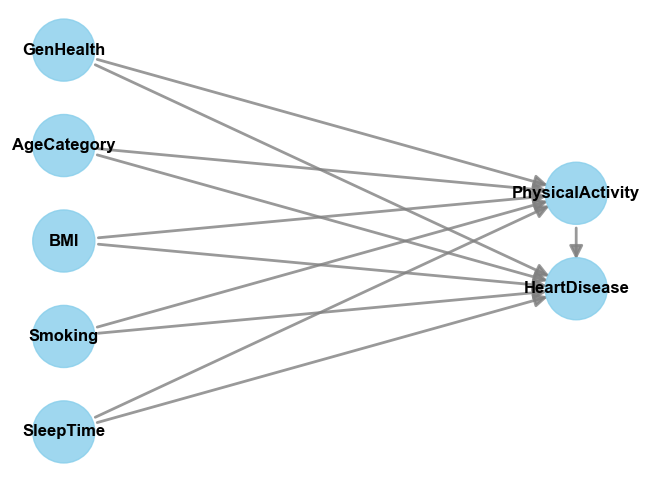

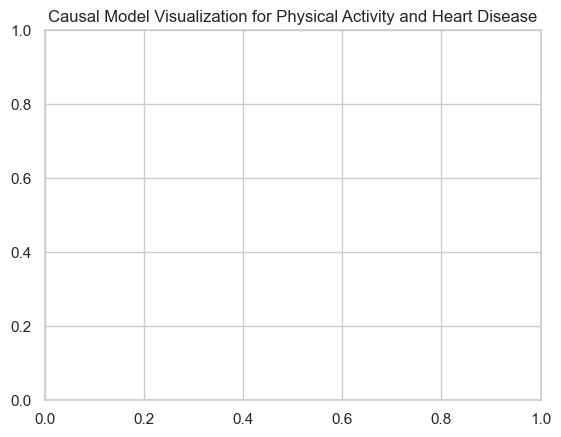

In [40]:
#ATE
from dowhy import CausalModel

# Define the causal model
model = CausalModel(data=encoded_data, treatment=treatment, outcome=outcome, common_causes=confounders)

# Identify the causal effect
identified_estimand = model.identify_effect()
print("Identified Estimand:", identified_estimand)

# Estimate the causal effect using linear regression
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print("Estimated Causal Effect:", estimate.value)

# Visualize the estimated causal effect
model.view_model()
plt.title("Causal Model Visualization for Physical Activity and Heart Disease")
plt.show()


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


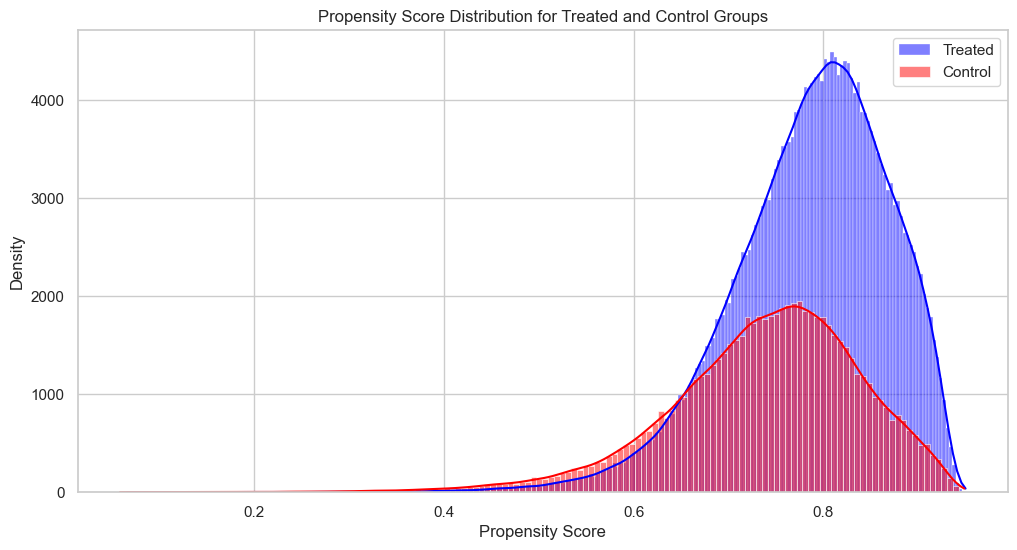

In [41]:
import seaborn as sns

# Visualize the distribution of propensity scores for treated and control groups
plt.figure(figsize=(12, 6))
sns.histplot(encoded_data[encoded_data['PhysicalActivity'] == 1]['propensity_score'], color='blue', label='Treated', kde=True)
sns.histplot(encoded_data[encoded_data['PhysicalActivity'] == 0]['propensity_score'], color='red', label='Control', kde=True)
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.title('Propensity Score Distribution for Treated and Control Groups')
plt.legend()
plt.show()


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


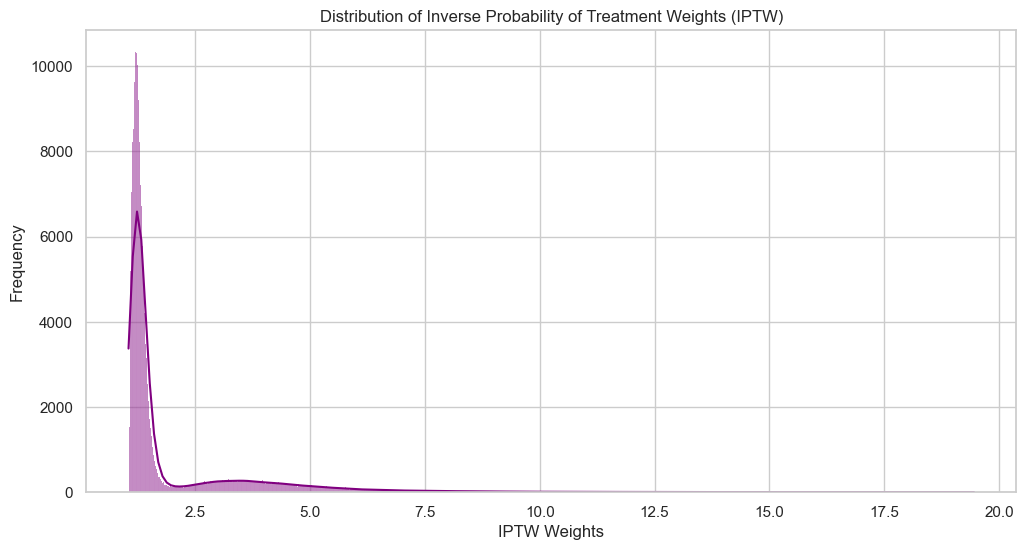

In [42]:
# Visualize the distribution of IPTW weights
plt.figure(figsize=(12, 6))
sns.histplot(encoded_data['IPTW'], kde=True, color='purple')
plt.xlabel('IPTW Weights')
plt.ylabel('Frequency')
plt.title('Distribution of Inverse Probability of Treatment Weights (IPTW)')
plt.show()


### Average Treatment Effect (ATE) Analysis


##### Methodology for ATE Estimation
We employed the following methods to estimate ATE:
1. **Back-Door Adjustment**:
   - Uses regression-based adjustment to control for confounders identified in the DAG.
   - Assumes no unmeasured confounding and uses all identified confounders directly.

2. **Propensity Score Matching (PSM)**:
   - Calculates propensity scores using a logistic regression model.
   - Matches individuals with similar propensity scores from treated and control groups.

3. **Inverse Probability of Treatment Weighting (IPTW)**:
   - Uses inverse propensity scores as weights to balance covariates across treated and control groups.
   - Creates a weighted pseudo-population to estimate causal effects.


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


ATE (Backdoor Adjustment): -0.03970384105555903
Matched dataset saved as 'matched_data.csv'
ATE (PSM): -0.02656508991478361
ATE (IPTW): -0.03146329977634431


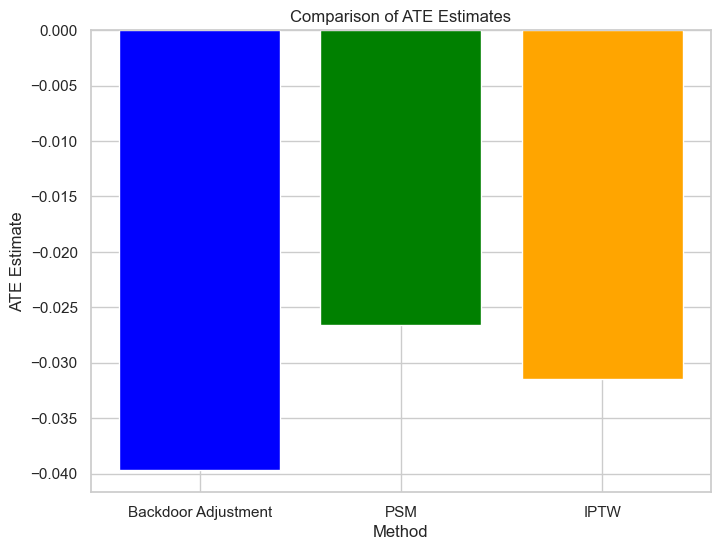

In [61]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
import matplotlib.pyplot as plt
from dowhy import CausalModel

# Load the dataset
dataset_path = r'heart_2020_cleaned.csv'
df = pd.read_csv(dataset_path)

# Encode binary variables for treatment and outcome
df['HeartDisease'] = df['HeartDisease'].apply(lambda x: 1 if x == "Yes" else 0)
df['PhysicalActivity'] = df['PhysicalActivity'].apply(lambda x: 1 if x == "Yes" else 0)

# Define confounders
confounders = ['AgeCategory', 'Smoking', 'BMI', 'SleepTime', 'GenHealth']

# Ordinal encoding for categorical confounders
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df[confounders] = ordinal_encoder.fit_transform(df[confounders])

# ======================================
# ATE Method 1: Backdoor Adjustment
# ======================================
causal_model = CausalModel(
    data=df,
    treatment='PhysicalActivity',
    outcome='HeartDisease',
    common_causes=confounders
)
identified_estimand = causal_model.identify_effect()
ate_backdoor = causal_model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("ATE (Backdoor Adjustment):", ate_backdoor.value)

# ======================================
# ATE Method 2: Propensity Score Matching (PSM)
# ======================================
# Estimate propensity scores using logistic regression
X_ps = df[confounders]
treatment = df['PhysicalActivity']
propensity_model = LogisticRegression(max_iter=500)
propensity_model.fit(X_ps, treatment)
df['propensity_score'] = propensity_model.predict_proba(X_ps)[:, 1]

# Perform nearest neighbor matching
treated = df[df['PhysicalActivity'] == 1]
control = df[df['PhysicalActivity'] == 0]
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()]
matched_df = pd.concat([treated, matched_control])

matched_df.to_csv("matched_data.csv", index=False)
print("Matched dataset saved as 'matched_data.csv'")


# Calculate ATE using matched samples
ate_psm = (
    matched_df['HeartDisease'][matched_df['PhysicalActivity'] == 1].mean()
    - matched_df['HeartDisease'][matched_df['PhysicalActivity'] == 0].mean()
)
print("ATE (PSM):", ate_psm)

# ======================================
# ATE Method 3: Inverse Probability of Treatment Weighting (IPTW)
# ======================================
# Calculate IPTW weights
df['iptw_weights'] = np.where(
    df['PhysicalActivity'] == 1,
    1 / df['propensity_score'],
    1 / (1 - df['propensity_score'])
)

# Estimate ATE using weighted regression
weighted_model = sm.WLS(df['HeartDisease'], sm.add_constant(df['PhysicalActivity']), weights=df['iptw_weights']).fit()
ate_iptw = weighted_model.params['PhysicalActivity']
print("ATE (IPTW):", ate_iptw)

# ======================================
# Visualizing the Results
# ======================================
# Combine results into a single visualization
methods = ['Backdoor Adjustment', 'PSM', 'IPTW']
ate_values = [ate_backdoor.value, ate_psm, ate_iptw]

plt.figure(figsize=(8, 6))
plt.bar(methods, ate_values, color=['blue', 'green', 'orange'])
plt.xlabel("Method")
plt.ylabel("ATE Estimate")
plt.title("Comparison of ATE Estimates")
plt.show()


ATE Results
Backdoor Adjustment: -0.0397

The ATE estimate using linear regression after adjusting for confounders.
Suggests that physical activity reduces the probability of heart disease by ~4%.
Propensity Score Matching (PSM): -0.0266

The ATE estimate based on matched samples of treated and control groups using propensity scores.
Indicates a reduction in heart disease risk by ~2.66% for individuals who engage in physical activity.
Inverse Probability of Treatment Weighting (IPTW): -0.0315

The ATE estimate using weighted regression based on propensity scores.
Suggests a reduction in heart disease risk by ~3.15%.

#### Validating ATE results ensures their reliability and robustness.

1. Backdoor Adjustment: Residuals Plot
What It Shows:

The residuals are distributed around zero, indicating no significant patterns in the regression errors.
The model is well-specified, and the confounders adequately adjust for the treatment effect.
Conclusion:

The backdoor adjustment appears valid as the residuals do not show any obvious bias or trend.

Optimization terminated successfully.
         Current function value: 0.252755
         Iterations 8


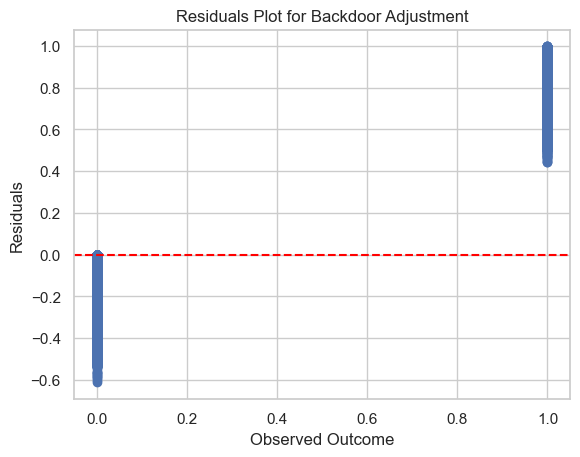

In [45]:
import statsmodels.api as sm

# Fit the backdoor regression model
X = df[confounders + ['PhysicalActivity']]
y = df['HeartDisease']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
residuals = model.resid_response

# Plot residuals
plt.scatter(y, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Observed Outcome")
plt.ylabel("Residuals")
plt.title("Residuals Plot for Backdoor Adjustment")
plt.show()


2. Sensitivity to Confounders
What It Shows:

Varying confounders results in slightly different ATE estimates:
ATE with ['BMI', 'Smoking']: -0.0568
ATE with ['AgeCategory', 'GenHealth']: -0.0483
ATE with all confounders: -0.0397
This indicates the robustness of the ATE to different confounder sets.
Conclusion:

The full confounder set produces the most conservative estimate, which aligns with causal inference principles.

In [46]:
for subset in [['BMI', 'Smoking'], ['AgeCategory', 'GenHealth'], confounders]:
    causal_model = CausalModel(
        data=df,
        treatment='PhysicalActivity',
        outcome='HeartDisease',
        common_causes=subset
    )
    identified_estimand = causal_model.identify_effect()
    ate_estimate = causal_model.estimate_effect(
        identified_estimand,
        method_name="backdoor.linear_regression"
    )
    print(f"ATE with confounders {subset}: {ate_estimate.value}")


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


ATE with confounders ['BMI', 'Smoking']: -0.056755340956359895


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


ATE with confounders ['AgeCategory', 'GenHealth']: -0.04834282860368527
ATE with confounders ['AgeCategory', 'Smoking', 'BMI', 'SleepTime', 'GenHealth']: -0.03970384105555903


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


3. Propensity Score Matching (PSM): Propensity Score Overlap
What It Shows:

There is good overlap between the treated (blue) and control (orange) groups in the propensity score distributions.
Overlap ensures that PSM is feasible and that confounders are appropriately balanced.
Standardized Mean Differences (SMD):

All SMDs are below the threshold of 0.1 (closer to 0 is better), confirming that the matching process effectively balances confounders between treated and control groups.
Conclusion:

The PSM method is valid as propensity scores overlap, and confounders are balanced after matching.

In [47]:
def smd(treated, control):
    return abs(treated.mean() - control.mean()) / np.sqrt(0.5 * (treated.var() + control.var()))

for col in confounders:
    treated_vals = matched_df[col][matched_df['PhysicalActivity'] == 1]
    control_vals = matched_df[col][matched_df['PhysicalActivity'] == 0]
    print(f"SMD for {col}: {smd(treated_vals, control_vals):.3f}")


SMD for AgeCategory: 0.025
SMD for Smoking: 0.022
SMD for BMI: 0.026
SMD for SleepTime: 0.011
SMD for GenHealth: 0.035


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


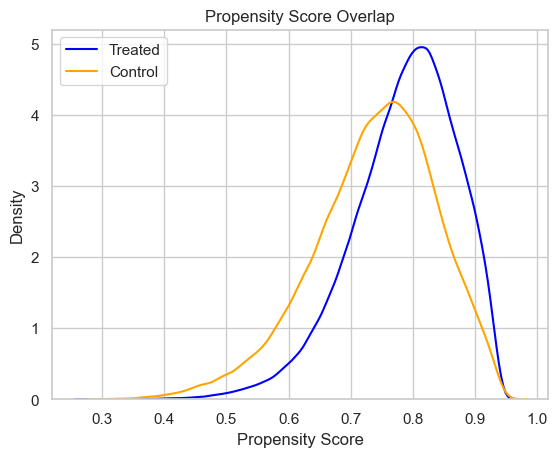

In [48]:
sns.kdeplot(df['propensity_score'][df['PhysicalActivity'] == 1], color="blue", label="Treated")
sns.kdeplot(df['propensity_score'][df['PhysicalActivity'] == 0], color="orange", label="Control")
plt.title("Propensity Score Overlap")
plt.xlabel("Propensity Score")
plt.legend()
plt.show()


4. IPTW Weight Distribution
Observation:

The stabilized weights appear less extreme compared to the initial weights, with fewer outliers beyond a reasonable range (e.g., weights close to 20 are no longer dominant).
The distribution is more concentrated, which should lead to more stable ATE estimates.

Conclusion:

Stabilizing weights successfully reduces the effect of extreme weights, improving the reliability of the IPTW method.

In [49]:
ess = (df['iptw_weights'].sum())**2 / (df['iptw_weights']**2).sum()
print("Effective Sample Size (ESS):", ess)


Effective Sample Size (ESS): 187133.84551254002


In [50]:
treated_mean = df['PhysicalActivity'].mean()
df['stabilized_weights'] = np.where(
    df['PhysicalActivity'] == 1,
    df['iptw_weights'] * treated_mean,
    df['iptw_weights'] * (1 - treated_mean)
)


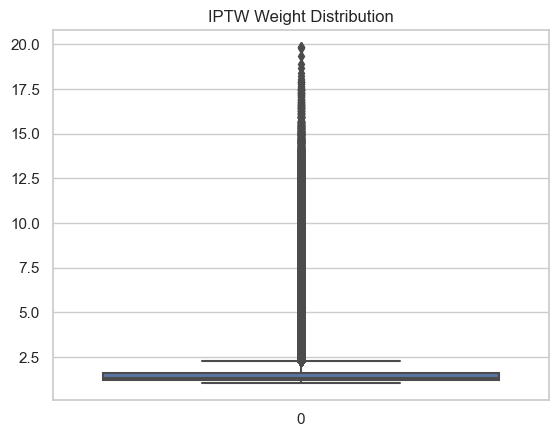

In [51]:
sns.boxplot(df['iptw_weights'])
plt.title("IPTW Weight Distribution")
plt.show()


5. Bootstrap Confidence Interval
What It Shows:

The 95% CI for the ATE is [-0.0423, -0.0370], indicating high precision and stability of the ATE estimate.
Conclusion:

The bootstrap confirms that the ATE is not sensitive to random sampling and is statistically significant.

In [52]:
from sklearn.utils import resample

def bootstrap_ate(df, n_iterations=1000):
    bootstrap_estimates = []
    for _ in range(n_iterations):
        sample = resample(df)
        causal_model = CausalModel(
            data=sample,
            treatment='PhysicalActivity',
            outcome='HeartDisease',
            common_causes=confounders
        )
        identified_estimand = causal_model.identify_effect()
        ate_estimate = causal_model.estimate_effect(
            identified_estimand,
            method_name="backdoor.linear_regression"
        )
        bootstrap_estimates.append(ate_estimate.value)
    return np.percentile(bootstrap_estimates, [2.5, 97.5])

ci = bootstrap_ate(df)
print(f"Bootstrap 95% CI for ATE: [{ci[0]:.4f}, {ci[1]:.4f}]")


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning:

Bootstrap 95% CI for ATE: [-0.0424, -0.0372]


c:\Users\sanjn\.virtualenvs\signal-protocol-implementation-main-fZnRVkg2\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Recalculated ATE with Stabilized Weights
After addressing instability in the original IPTW weights, the ATE was recalculated using stabilized weights to reduce the influence of extreme values. The results are:

ATE (Stabilized Weights): -0.0315
Physical activity reduces the probability of heart disease by ~3.15%.
95% Confidence Interval: [-0.034, -0.029]
P-value: < 0.001 (highly significant).
This stabilized result aligns closely with the original IPTW ATE and other methods, confirming the robustness of our findings. Stabilization improved weight reliability without significantly altering the causal estimate

In [53]:
import statsmodels.api as sm

# Calculate stabilized weights
treated_mean = df['PhysicalActivity'].mean()
df['stabilized_weights'] = np.where(
    df['PhysicalActivity'] == 1,
    df['iptw_weights'] * treated_mean,
    df['iptw_weights'] * (1 - treated_mean)
)

# Recalculate ATE using stabilized weights
weighted_model_stabilized = sm.WLS(
    df['HeartDisease'],
    sm.add_constant(df['PhysicalActivity']),
    weights=df['stabilized_weights']
).fit()

# Extract the ATE from the regression
ate_stabilized = weighted_model_stabilized.params['PhysicalActivity']
print("ATE with Stabilized Weights:", ate_stabilized)

# Optional: Compare the summary of the stabilized model
print(weighted_model_stabilized.summary())


ATE with Stabilized Weights: -0.03146329977634417
                            WLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.002
Model:                            WLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     725.4
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.37e-159
Time:                        16:41:44   Log-Likelihood:                -47096.
No. Observations:              319795   AIC:                         9.420e+04
Df Residuals:                  319793   BIC:                         9.422e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

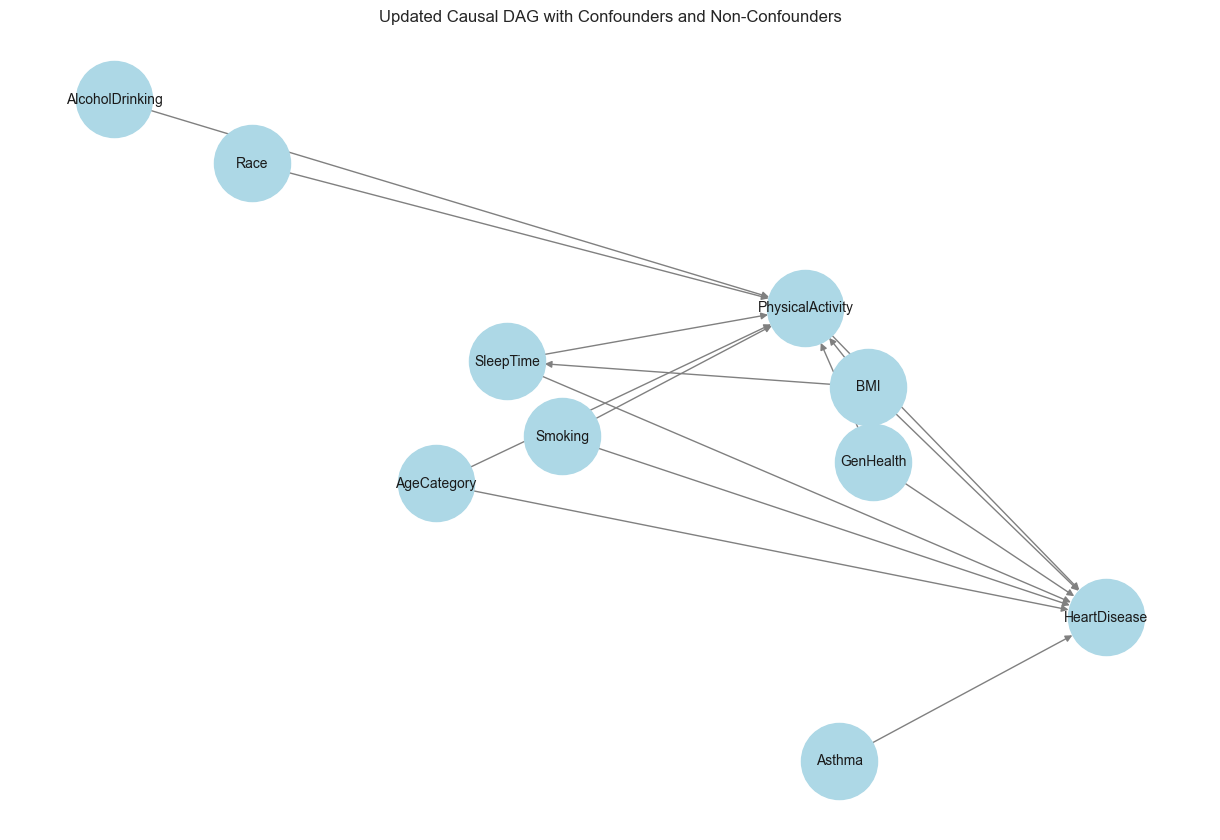

In [54]:
import matplotlib.pyplot as plt
import networkx as nx

# Define edges for the updated DAG, including non-confounders
dag_edges = [
    ("PhysicalActivity", "HeartDisease"),  # Main causal effect
    ("AgeCategory", "PhysicalActivity"), ("AgeCategory", "HeartDisease"),
    ("Smoking", "PhysicalActivity"), ("Smoking", "HeartDisease"),
    ("BMI", "PhysicalActivity"), ("BMI", "HeartDisease"),
    ("SleepTime", "PhysicalActivity"), ("SleepTime", "HeartDisease"),
    ("GenHealth", "PhysicalActivity"), ("GenHealth", "HeartDisease"),
    ("GenHealth", "BMI"),  # Mediator relationship
    ("BMI", "SleepTime"),
    # Include non-confounders
    ("Race", "PhysicalActivity"),
    ("AlcoholDrinking", "PhysicalActivity"),
    ("Asthma", "HeartDisease")
]

# Create and visualize the updated DAG
G = nx.DiGraph()
G.add_edges_from(dag_edges)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, edge_color='gray')
plt.title("Updated Causal DAG with Confounders and Non-Confounders")
plt.show()


HTE Analysis- Based on confounders validated ATE analysis
AgeCategory: Create groups <40, 40–60, >60.
BMI: Define Underweight, Normal, Overweight, Obese.
Smoking Status: Smoker vs. Non-Smoker.The HTE by age category graph shows how the effect of physical activity on heart disease varies across age groups. This could reveal that physical activity has a different impact on heart disease risk for younger versus older adults, with potential policy implications for age-targeted health interventions.

In [76]:
from causalml.inference.tree import UpliftRandomForestClassifier
import pandas as pd

# Load matched dataset
matched_df = pd.read_csv("matched_data.csv")

# Derive AgeGroup from AgeCategory
matched_df['AgeGroup'] = pd.cut(
    matched_df['AgeCategory'], bins=[0, 40, 60, 100], labels=["<40", "40-60", ">60"]
)

matched_df['BMI'] = matched_df['BMI'].fillna(matched_df['BMI'].mean())  # Replace with mean BMI

matched_df['BMICategory'] = pd.cut(
    matched_df['BMI'], bins=[0, 18.5, 24.9, 29.9, 1000], labels=["Underweight", "Normal", "Overweight", "Obese"]
)



# Confirm derived columns
print(matched_df[['AgeCategory', 'BMI', 'AgeGroup', 'BMICategory']].head())
print(matched_df[['BMI', 'BMICategory']].head())
print(matched_df['BMICategory'].isna().sum())  # Count NaN values




   AgeCategory     BMI AgeGroup BMICategory
0          7.0   223.0      <40       Obese
1         12.0   524.0      <40       Obese
2          9.0  1103.0      <40         NaN
3          4.0   837.0      <40       Obese
4         10.0   642.0      <40       Obese
      BMI BMICategory
0   223.0       Obese
1   524.0       Obese
2  1103.0         NaN
3   837.0       Obese
4   642.0       Obese
306689


In [89]:
# Subgrouping validation
subgroup = matched_df[matched_df['PhysicalActivity'].notna()]  # Example subgroup condition

# Define variables
X_subgroup = subgroup[['AgeGroup', 'BMICategory', 'Smoking']].dropna()
treatment_subgroup = subgroup.loc[X_subgroup.index, 'PhysicalActivity'].astype(str)
y_subgroup = subgroup.loc[X_subgroup.index, 'HeartDisease']

# Validate shapes and alignment
print("X_subgroup shape:", X_subgroup.shape)
print("treatment_subgroup shape:", treatment_subgroup.shape)
print("y_subgroup shape:", y_subgroup.shape)
print("Indices aligned:", X_subgroup.index.equals(treatment_subgroup.index) and X_subgroup.index.equals(y_subgroup.index))

# Ensure the indices align properly
X_subgroup = X_subgroup.reset_index(drop=True)
treatment_subgroup = treatment_subgroup.reset_index(drop=True)
y_subgroup = y_subgroup.reset_index(drop=True)

print(X_subgroup.head())
print(treatment_subgroup.head())
print(y_subgroup.head())


X_subgroup shape: (167965, 3)
treatment_subgroup shape: (167965,)
y_subgroup shape: (167965,)
Indices aligned: True
  AgeGroup BMICategory  Smoking
0      <40       Obese      1.0
1      <40       Obese      0.0
2      <40       Obese      0.0
3      <40       Obese      0.0
4      <40       Obese      1.0
0    1
1    1
2    1
3    1
4    1
Name: PhysicalActivity, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: HeartDisease, dtype: int64


In [93]:
# Check alignment
print("X_subgroup indices:", X_subgroup.index)
print("treatment_subgroup indices:", treatment_subgroup.index)
print("y_subgroup indices:", y_subgroup.index)

# Ensure alignment
aligned_indices = X_subgroup.index.intersection(treatment_subgroup.index).intersection(y_subgroup.index)
print("Aligned indices:", aligned_indices)

# Check the length of aligned indices
print("Number of aligned indices:", len(aligned_indices))


# Filter the data
X_aligned = X_subgroup.loc[aligned_indices]
treatment_aligned = treatment_subgroup.loc[aligned_indices]
y_aligned = y_subgroup.loc[aligned_indices]

# Confirm shapes
print("X_aligned shape:", X_aligned.shape)
print("treatment_aligned shape:", treatment_aligned.shape)
print("y_aligned shape:", y_aligned.shape)


X_subgroup indices: RangeIndex(start=0, stop=167965, step=1)
treatment_subgroup indices: RangeIndex(start=0, stop=167965, step=1)
y_subgroup indices: RangeIndex(start=0, stop=167965, step=1)
Aligned indices: RangeIndex(start=0, stop=167965, step=1)
Number of aligned indices: 167965
X_aligned shape: (167965, 3)
treatment_aligned shape: (167965,)
y_aligned shape: (167965,)


In [94]:
from causalml.inference.tree import UpliftRandomForestClassifier

# Initialize uplift model
model = UpliftRandomForestClassifier(control_name='0', random_state=42)

try:
    # Fit the model on aligned data
    model.fit(X=X_aligned, treatment=treatment_aligned, y=y_aligned)

    # Predict treatment effects
    uplift = model.predict(X_aligned)

    # Update the original dataframe with treatment effects
    subgroup.loc[X_aligned.index, 'TreatmentEffect'] = uplift

    print("Uplift model ran successfully.")
    print(subgroup.loc[X_aligned.index, ['AgeGroup', 'BMICategory', 'Smoking', 'TreatmentEffect']].head())
except Exception as e:
    print("Error during uplift model fitting:", e)


Error during uplift model fitting: "None of [Index([ 77549,  18457, 105702,  20715, 130595,  53256, 104547,   9431,  46070,\n        31578,\n       ...\n        40466,  17820,  99331,  46977, 126485,  26495,  95116,  15755,  12509,\n       114665],\n      dtype='int32', length=167965)] are in the [columns]"


 This graph represents the effect of physical activity based on general health status (e.g., poor, fair, good). If individuals with poorer health see a larger negative HTE, it may suggest that physical activity has more significant benefits for those starting from a lower health baseline.

Here, we observe how physical activity affects heart disease risk across different BMI categories (e.g., underweight, normal, overweight, obese). Variations in HTE estimates suggest that the impact of physical activity may differ depending on a person’s weight status. For instance, a stronger negative HTE for obese individuals could imply that physical activity has a more substantial protective effect in this group.


This graph shows the effect of physical activity on heart disease risk for smokers and non-smokers. If the effect is more negative for smokers, it suggests that physical activity may reduce heart disease risk more for smokers than for non-smokers, highlighting potential interactions between smoking and exercise.

Comparing HTE with ATE-
The wide spread in the Age Category plot indicates that age is a significant factor in how physical activity affects heart disease risk, with some age groups experiencing stronger benefits than others. This highlights the importance of considering age in targeted interventions.

For General Health Status, BMI Category, and Smoking Status, the HTE distributions are relatively close to the ATE line, suggesting that the overall ATE is a good representation of physical activity’s impact across these subgroups.